In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.width',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading of mushroom_train in our kernel
train_data = pd.read_csv("D:\\Machine Learning\\DSG Assignment\\mushroom_train.csv")
train_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m


In [3]:
len(train_data)

5686

In [4]:
train_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
#two continuos variable and remaining are categorical variable
#below code for creating array of categorical_variable
categorical_variable = train_data.dtypes[train_data.dtypes == 'object'].index.values
categorical_variable

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], dtype=object)

In [6]:
#uniqueness of categorical_variable
train_data[categorical_variable].apply(lambda x: len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
train_data['stalk-root'].value_counts()

b    2665
?    1727
e     780
c     382
r     132
Name: stalk-root, dtype: int64

In [8]:
#removing stalk-root column bcz there are large no. of missing data
train_data2 = train_data.drop("stalk-root",axis = 1)

In veil-type column all the values are same

It has no effect on our model

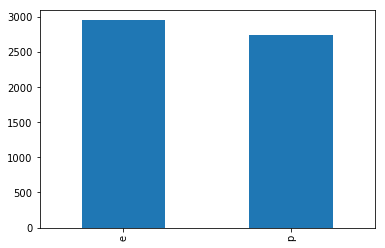

In [9]:
#plotting histogram for class column
train_data['class'].value_counts().plot(kind='bar')

In [10]:
# for finding counts of p and e in class column
train_data['class'].value_counts()

e    2945
p    2741
Name: class, dtype: int64

In [11]:
#we have to predict values of class column so class is our dependent_variable and rest are independent_variable
dependent_variable = 'class'
independent_variable = [x for x in (train_data.columns) if x not in [dependent_variable]]

In [12]:
# to convert categorical_variable into numbers for fitting in model
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [13]:
# considering missing data of feature 'stalk-root' as a object 
for a in categorical_variable:
    train_data[a] = LE.fit_transform(train_data[a])

In [14]:
train_data.head(10)                # e = 0 and p = 1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,1,0,215,2,1,6,7,0,2,38,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,0,3,94,2,2,7,7,0,2,43,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,0,0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,1,0,286,1,2,6,7,0,2,82,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,0,2,110,2,2,7,7,0,2,36,1,4,3,3,3
5,1,5,0,9,0,2,1,0,0,3,0,1,66,1,1,6,4,0,2,23,1,2,1,5,1
6,0,2,2,3,0,5,1,1,0,7,1,3,11,2,2,7,7,0,2,43,1,0,3,0,1
7,0,2,0,4,1,5,1,0,0,9,1,1,207,2,2,3,7,0,2,25,1,4,3,4,0
8,1,5,3,2,0,2,1,0,1,0,1,0,60,2,2,6,6,0,2,50,1,0,7,4,4
9,1,5,2,3,1,2,1,0,0,3,1,1,84,2,2,7,7,0,2,47,1,4,1,4,1


In [15]:
# for finding correlations between the features 
train_data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.042155,0.176899,-0.018315,-0.502157,-0.091765,0.119715,-0.348396,0.539296,-0.531714,-0.110221,-0.369834,0.051789,-0.339821,-0.303188,-0.141789,-0.140983,NaN,0.139915,0.007413,-0.217923,-0.413472,0.164303,0.292035,0.216358
cap-shape,0.042155,1.000000,-0.050507,-0.049525,-0.028575,-0.021651,0.073417,-0.001366,0.046013,-0.006245,0.065408,0.041449,-0.028290,-0.029756,-0.031333,-0.035038,-0.029181,NaN,0.064026,0.015889,-0.123694,-0.026889,-0.084278,0.070923,-0.042490
cap-surface,0.176899,-0.050507,1.000000,-0.023641,0.066776,0.051636,-0.033450,-0.274616,0.207781,-0.167356,-0.012494,-0.124124,0.010855,0.082593,0.099681,0.070571,0.063991,NaN,-0.013444,-0.010072,-0.023283,-0.113144,0.231465,0.012944,0.158039
cap-color,-0.018315,-0.049525,-0.023641,1.000000,-0.011004,-0.384536,0.041425,0.149580,-0.164310,0.079571,-0.455951,0.310565,-0.041630,-0.061341,-0.061882,-0.000779,-0.004182,NaN,0.037910,0.003412,0.000711,0.153141,-0.284759,-0.153048,0.038552
bruises,-0.502157,-0.028575,0.066776,-0.011004,1.000000,-0.055836,0.132196,-0.299498,-0.365449,0.526684,0.104269,0.244906,-0.041373,0.461709,0.459844,0.071998,0.088409,NaN,0.113148,-0.012115,0.049784,0.693615,-0.284631,0.082524,-0.078090
odor,-0.091765,-0.021651,0.051636,-0.384536,-0.055836,1.000000,-0.054703,0.065724,0.319945,-0.128353,0.458874,-0.205695,0.028405,0.127045,0.074021,0.175100,0.178315,NaN,-0.052985,0.010299,0.112166,-0.277452,0.473380,-0.047982,-0.033562
gill-attachment,0.119715,0.073417,-0.033450,0.041425,0.132196,-0.054703,1.000000,0.068124,0.103890,-0.124812,0.177779,0.134268,-0.045920,-0.081394,-0.112935,0.097695,0.093831,NaN,0.894226,0.016178,0.095721,-0.138358,-0.029423,0.169458,-0.027452
gill-spacing,-0.348396,-0.001366,-0.274616,0.149580,-0.299498,0.065724,0.068124,1.000000,-0.105925,0.103402,0.070504,0.338643,-0.028612,-0.201880,-0.205091,0.276282,0.253343,NaN,0.074113,0.002415,0.251853,-0.189465,0.060826,-0.527422,-0.149350
gill-size,0.539296,0.046013,0.207781,-0.164310,-0.365449,0.319945,0.103890,-0.105925,1.000000,-0.515428,0.208756,-0.333757,0.032306,0.055582,0.013449,0.300321,0.284636,NaN,0.101500,0.017982,-0.175917,-0.460385,0.619809,0.136891,0.160517
gill-color,-0.531714,-0.006245,-0.167356,0.079571,0.526684,-0.128353,-0.124812,0.103402,-0.515428,1.000000,-0.168804,0.311865,-0.027378,0.225269,0.261116,-0.064780,-0.080552,NaN,-0.092610,-0.008161,0.097492,0.624766,-0.408625,-0.033504,-0.206406


In [16]:
from sklearn.linear_model import LogisticRegression
Model1 = LogisticRegression()

In [17]:
# for splitting our train_data into 2 parts 
# one for model and other for test for finding accuracy on our data
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, test_size=.2, stratify=train_data['class'])
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
3830,0,2,3,3,1,5,1,0,0,7,1,1,30,2,2,3,6,0,2,41,1,4,2,4,0
4302,1,2,2,4,0,7,1,0,1,0,1,0,734,1,2,7,6,0,2,46,1,0,7,4,2
903,0,5,0,4,1,5,1,0,0,10,1,1,92,2,2,6,3,0,2,25,1,4,2,5,0
879,1,5,0,9,0,2,1,0,0,7,0,1,210,1,1,6,4,0,2,24,1,2,1,5,4
3762,1,5,3,9,0,2,1,0,0,7,0,1,5,1,1,0,6,0,2,23,1,2,1,5,0


In [18]:
# fitting model
Model1.fit(train[independent_variable],train[dependent_variable])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
#prediction of test data of train_data
prediction1 = Model1.predict(test[independent_variable])

In [20]:
prediction1

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
# for finding accuracy of test data of train_data
from sklearn.metrics import accuracy_score
accuracy_score(prediction1,test['class'])

0.95166959578207377

In [22]:
#finding confusion_matrix and classification_report of above prediction
from sklearn.metrics import confusion_matrix,classification_report
#confusion_matrix is a evaluation matrix which describes relation(accuracy) between the actual value and the predicted value
print confusion_matrix(test['class'], prediction1 )
#classification_report decribes the True Positive Rate(precision) and the False Positive Rate(recall) and f1-score(harmonic mean of TPR and FPR) with the help of confusion_matrix 
print classification_report(test['class'], prediction1 )

[[561  28]
 [ 27 522]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       589
          1       0.95      0.95      0.95       549

avg / total       0.95      0.95      0.95      1138



In [23]:
from sklearn.linear_model import LogisticRegression
Model11 = LogisticRegression()

In [24]:
#removing stalk-root column bcz there are large no. of missing data
train_data2 = train_data.drop("stalk-root",axis = 1)
train1, test1 = train.drop("stalk-root",axis = 1),test.drop("stalk-root",axis = 1)
test1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
3830,0,2,3,3,1,5,1,0,0,7,1,30,2,2,3,6,0,2,41,1,4,2,4,0
4302,1,2,2,4,0,7,1,0,1,0,1,734,1,2,7,6,0,2,46,1,0,7,4,2
903,0,5,0,4,1,5,1,0,0,10,1,92,2,2,6,3,0,2,25,1,4,2,5,0
879,1,5,0,9,0,2,1,0,0,7,0,210,1,1,6,4,0,2,24,1,2,1,5,4
3762,1,5,3,9,0,2,1,0,0,7,0,5,1,1,0,6,0,2,23,1,2,1,5,0


In [25]:
dependent_variable1 = 'class'
independent_variable1 = [x for x in (train_data2.columns) if x not in [dependent_variable1]]
Model11.fit(train1[independent_variable1],train1[dependent_variable])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
prediction11 = Model11.predict(test1[independent_variable1])

In [27]:
prediction11

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [28]:
accuracy_score(prediction11,test1['class'])

0.94991212653778556

There is almost no change in accuracy after removing the **stalk-root** column
From this we conclude that removing of **stalk-root** column and then do our prediction is good

In [29]:
train_data = train_data.drop("stalk-root", axis = 1)

In [30]:
# now we change our model by finding best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression()
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
def cv_optimize(model, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    gs = GridSearchCV(model, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [31]:
df = train.drop('class', axis =1)
column_names = df.columns
X = train[column_names].values
y = train['class'].values

model21 = cv_optimize(Model2, parameters,X,y)
model21

BEST {'C': 1000} 0.969437115215 [mean: 0.85994, std: 0.00571, params: {'C': 0.001}, mean: 0.90479, std: 0.00283, params: {'C': 0.01}, mean: 0.93382, std: 0.00249, params: {'C': 0.1}, mean: 0.95141, std: 0.00454, params: {'C': 1}, mean: 0.95690, std: 0.00401, params: {'C': 10}, mean: 0.96878, std: 0.00331, params: {'C': 100}, mean: 0.96944, std: 0.00478, params: {'C': 1000}, mean: 0.96856, std: 0.00459, params: {'C': 10000}, mean: 0.96944, std: 0.00488, params: {'C': 100000}]


C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
prediction2=model21.predict(test[independent_variable])

In [33]:
prediction2

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [34]:
accuracy_score(prediction2,test['class'])

0.97012302284710017

In [35]:
print confusion_matrix(test['class'], prediction2 )

print classification_report(test['class'], prediction2 )

[[569  20]
 [ 14 535]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       589
          1       0.96      0.97      0.97       549

avg / total       0.97      0.97      0.97      1138



In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
Model3 = LogisticRegression()
kf = KFold(n_splits = 5)
scoring = 'accuracy'
results = cross_val_score(model21, X, y, cv=kf, scoring = scoring)
print results
# making a list of models
a = []
accuracy__score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    b = [X_train, X_test,Y_train, Y_test]
    df = pd.DataFrame(X_train, columns = independent_variable)
    df2 = pd.DataFrame(X_test, columns = independent_variable)
    p = cv_optimize(Model3, parameters,X_train,Y_train)
    prediction3 = p.predict(df2)
    print accuracy_score(prediction3, Y_test)
    accuracy__score.append(accuracy_score(prediction3, Y_test))
    a.append(p)                         #appending list of models
    print confusion_matrix(Y_test, prediction3 )
    print classification_report(Y_test, prediction3 )

[ 0.96703297  0.97032967  0.97362637  0.95929593  0.97469747]
BEST {'C': 100000} 0.968389224849 [mean: 0.85596, std: 0.01452, params: {'C': 0.001}, mean: 0.89940, std: 0.00347, params: {'C': 0.01}, mean: 0.93046, std: 0.00454, params: {'C': 0.1}, mean: 0.94722, std: 0.00713, params: {'C': 1}, mean: 0.95190, std: 0.00688, params: {'C': 10}, mean: 0.96564, std: 0.00491, params: {'C': 100}, mean: 0.96811, std: 0.00340, params: {'C': 1000}, mean: 0.96811, std: 0.00360, params: {'C': 10000}, mean: 0.96839, std: 0.00377, params: {'C': 100000}]
0.967032967033
[[445  12]
 [ 18 435]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       457
          1       0.97      0.96      0.97       453

avg / total       0.97      0.97      0.97       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 10000} 0.971962616822 [mean: 0.85542, std: 0.01290, params: {'C': 0.001}, mean: 0.89967, std: 0.00439, params: {'C': 0.01}, mean: 0.93513, std: 0.00555, params: {'C': 0.1}, mean: 0.94997, std: 0.00614, params: {'C': 1}, mean: 0.95739, std: 0.00888, params: {'C': 10}, mean: 0.96976, std: 0.00290, params: {'C': 100}, mean: 0.97114, std: 0.00260, params: {'C': 1000}, mean: 0.97196, std: 0.00223, params: {'C': 10000}, mean: 0.97169, std: 0.00205, params: {'C': 100000}]
0.97032967033
[[456  12]
 [ 15 427]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       468
          1       0.97      0.97      0.97       442

avg / total       0.97      0.97      0.97       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 1000} 0.967014843321 [mean: 0.85651, std: 0.01607, params: {'C': 0.001}, mean: 0.89445, std: 0.00524, params: {'C': 0.01}, mean: 0.93018, std: 0.00519, params: {'C': 0.1}, mean: 0.94475, std: 0.00567, params: {'C': 1}, mean: 0.95190, std: 0.00690, params: {'C': 10}, mean: 0.96482, std: 0.00283, params: {'C': 100}, mean: 0.96701, std: 0.00357, params: {'C': 1000}, mean: 0.96619, std: 0.00342, params: {'C': 10000}, mean: 0.96647, std: 0.00403, params: {'C': 100000}]
0.973626373626
[[462  12]
 [ 12 424]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       474
          1       0.97      0.97      0.97       436

avg / total       0.97      0.97      0.97       910



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 100000} 0.964825501511 [mean: 0.85683, std: 0.01085, params: {'C': 0.001}, mean: 0.89585, std: 0.00955, params: {'C': 0.01}, mean: 0.93597, std: 0.00334, params: {'C': 0.1}, mean: 0.95356, std: 0.00198, params: {'C': 1}, mean: 0.95631, std: 0.00550, params: {'C': 10}, mean: 0.96153, std: 0.00809, params: {'C': 100}, mean: 0.96455, std: 0.00792, params: {'C': 1000}, mean: 0.96318, std: 0.00690, params: {'C': 10000}, mean: 0.96483, std: 0.00798, params: {'C': 100000}]
0.960396039604
[[463  25]
 [ 11 410]]
             precision    recall  f1-score   support

          0       0.98      0.95      0.96       488
          1       0.94      0.97      0.96       421

avg / total       0.96      0.96      0.96       909



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'C': 100} 0.972519923056 [mean: 0.85820, std: 0.00816, params: {'C': 0.001}, mean: 0.89970, std: 0.00782, params: {'C': 0.01}, mean: 0.93350, std: 0.00506, params: {'C': 0.1}, mean: 0.95164, std: 0.00682, params: {'C': 1}, mean: 0.96153, std: 0.00816, params: {'C': 10}, mean: 0.97252, std: 0.00562, params: {'C': 100}, mean: 0.97252, std: 0.00415, params: {'C': 1000}, mean: 0.97252, std: 0.00311, params: {'C': 10000}, mean: 0.97170, std: 0.00353, params: {'C': 100000}]
0.971397139714
[[457  12]
 [ 14 426]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       469
          1       0.97      0.97      0.97       440

avg / total       0.97      0.97      0.97       909



C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [37]:
maximum_accuracy = max (accuracy__score)                    #maximum accuracy using KFold
index__value = accuracy__score.index(maximum_accuracy)           #finding index value at which maximum accuracy present
best_model = a[index__value]                                     #using index value to find best model of KFold
best_model

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# using DecisionTreeClassifier for predictiong our model

In [38]:
# model is formed with the help of all features except stalk-root
from sklearn.tree import DecisionTreeClassifier
Model4 = DecisionTreeClassifier()
Model4.fit(train1[independent_variable1],train1[dependent_variable1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
#remaining procedure is same as logistic regression
prediction4  = Model4.predict(test1[independent_variable1])
prediction4

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
confusion_matrix(test['class'], prediction4 )

array([[589,   0],
       [  0, 549]])

In [41]:
print classification_report(test['class'], prediction4)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       589
          1       1.00      1.00      1.00       549

avg / total       1.00      1.00      1.00      1138



# Prediction of mushroom_test
Now, we predict our mushroom_test using DecisionTreeClassifier because its accuracy is one

In [42]:
test_data = pd.read_csv("D:\\Machine Learning\\DSG Assignment\\mushroom_test.csv")
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m


In [43]:
test_data.shape

(2438, 24)

In [44]:
#dropping stalk-root column because our model is made with all features of train_data/test_data except stalk-root
test_data = test_data.drop('stalk-root', axis =1)

In [45]:
test_data.shape

(2438, 23)

In [46]:
categorical_variable_test = test_data.dtypes[test_data.dtypes == 'object'].index.values
categorical_variable_test

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'], dtype=object)

In [47]:
test_data[categorical_variable_test].apply(lambda x: len(x.unique()))

cap-shape                    5
cap-surface                  3
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       8
stalk-color-below-ring       9
veil-type                    1
veil-color                   3
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [48]:
for a in categorical_variable_test:
    test_data[a] = LE.fit_transform(test_data[a])

In [49]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,32,2,2,6,3,0,2,23,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,7,1,1,0,0,0,2,23,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,2,2,2,7,7,0,2,24,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,2,1,1,4,0,0,2,53,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,10,2,2,7,7,0,2,24,1,4,2,2,3


In [50]:
prediction = Model4.predict(test_data)

In [51]:
test_data['class'] = prediction

In [52]:
test_data['class'].value_counts()

0    1263
1    1175
Name: class, dtype: int64

In [53]:
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,4,0,3,1,5,1,0,0,9,1,32,2,2,6,3,0,2,23,1,4,2,5,0,0
1,4,2,3,0,2,1,0,0,2,0,7,1,1,0,0,0,2,23,1,2,1,4,0,1
2,0,1,8,1,0,1,0,0,10,0,2,2,2,7,7,0,2,24,1,4,2,3,3,0
3,1,2,9,0,2,1,0,0,7,0,2,1,1,4,0,0,2,53,1,2,1,5,0,1
4,0,2,9,1,0,1,0,0,10,0,10,2,2,7,7,0,2,24,1,4,2,2,3,0
